<h2>Importación de librerías</h2>

In [102]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

<h2>Cramos la clase Nodo</h2>

In [103]:
class Nodo():
    """
    Clase para crear un nodo
    """
    def __init__(self, nombre):
        """
        Constructor de la clase nodo.

        Args:
            nombre (str): Nombre del nodo.
        """
        self.nombre = nombre


<h2>Cramos la clase Arista</h2>

In [104]:
class Arista():
    """
    Clase para crear una arista
    """
    def __init__(self, nodoOrigen, nodoDestino, tiempo):
        """
        Constructor de la clase nodo.

        Args:
            nodoOrigen (str): Nombre del nodo origen.
            nodoDestino (str): Nombre del nodo destino.
            tiempo (int): Horas que se tarda en llegar del nodo origen al nodo destino
        """
        self.nodoOrigen = nodoOrigen
        self.nodoDestino = nodoDestino
        self.tiempo = tiempo

<h2>Cramos la clase Grafo</h2>

In [ ]:
class Grafo():

    # Función que se encarga de recibir los datos del csv
    def cargar_desde_csv(archivo):
        path = fr".\csv\{archivo}"
        df = pd.DataFrame()
        df = pd.read_csv(path)
        return df

<h2>Extraemos los datos del csv</h2>

In [120]:
#Importamos el csv en un dataframe
repartos_df = Grafo.cargar_desde_csv("datos.csv")

<h2>Creamos las aristas</h2>

In [ ]:
# Creación de listas para la implementación de datos
lista_Origen = []
lista_Destino = []
lista_Tiempo = []

# Asignamos a cada variable el array que queremos recorrer
origenes = repartos_df['Origen']
destinos = repartos_df['Destino']
tiempos = repartos_df['TiempoRuta']

# Guardamos los valores en su lista correspondiente
for origen in origenes:
    lista_Origen.append(origen)
for destino in destinos:
    lista_Destino.append(destino)
for tiempo in tiempos:
    lista_Tiempo.append(tiempo)

# Definimos la heurística (estimación de la distancia a la meta)
heuristicas = {}

def heuristica(nodo, meta):
    return heuristicas[nodo]

G = nx.Graph()

# Agregamos nodos y aristas (con el peso de cada arista)
for i in range(len(lista_Origen)):
    G.add_edge(lista_Origen[i], lista_Destino[i], weight=lista_Tiempo[i])
    heuristicas[lista_Origen[i]] = lista_Tiempo[i]

<h2>Usamos el algoritmo A_Star de networkx</h2>

In [ ]:
camino_astar = nx.astar_path(G, 'C', 'H', heuristic=heuristica, weight='weight') 
camino_astar_longitud = nx.astar_path_length(G, 'C', 'H', heuristic=heuristica, weight='weight')

# Mostramos el resultado
print(f"Camino encontrado desde A hasta E: {camino_astar}")
print(f"Coste total del recorrido: {camino_astar_longitud}")

Camino encontrado desde A hasta E: ['C', 'E', 'G', 'H']
Coste total del recorrido: 36


<h2>Usamos el algoritmo dijkstra de networkx</h2>

In [108]:
# Calcular el camino más corto y su longitud usando Dijkstra
camino_dijkstra = nx.dijkstra_path(G, 'C', 'H')
camino_dijkstra_longitud = nx.dijkstra_path_length(G, 'C', 'H')

# Mostramos el resultado
print(f"Camino encontrado desde A hasta E: {camino_dijkstra}")
print(f"Coste total del recorrido: {camino_dijkstra_longitud}")

Camino encontrado desde A hasta E: ['C', 'E', 'G', 'H']
Coste total del recorrido: 36


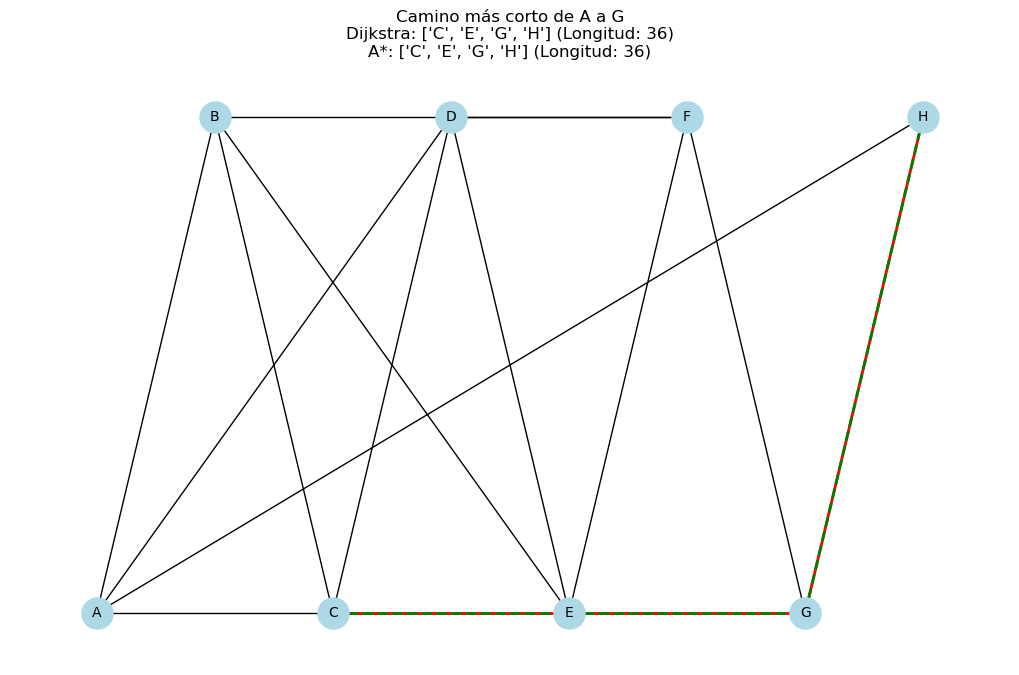

In [110]:
# Definir posiciones de los nodos para la heurística
pos = {
    'A': np.array([-1, -1]),
    'B': np.array([0, 1]),
    'C': np.array([1, -1]),
    'D': np.array([2, 1]),
    'E': np.array([3, -1]),
    'F': np.array([4, 1]),
    'G': np.array([5, -1]),
    'H': np.array([6, 1]),
}

# Mostrar el grafo y el camino más corto
plt.figure(figsize=(10, 6))

# Dibujar nodos y aristas
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

# Resaltar el camino más corto usando Dijkstra
resultado_dijkstra = list(zip(camino_dijkstra, camino_dijkstra[1:]))
nx.draw_networkx_edges(G, pos, edgelist=resultado_dijkstra, edge_color='r', width=2)

# Resaltar el camino más corto usando A*
resultado_astar = list(zip(camino_astar, camino_astar[1:]))
nx.draw_networkx_edges(G, pos, edgelist=resultado_astar, edge_color='g', width=2, style='dashed')

plt.title(f"Camino más corto de A a G\n"
          f"Dijkstra: {camino_dijkstra} (Longitud: {camino_dijkstra_longitud})\n"
          f"A*: {camino_astar} (Longitud: {camino_astar_longitud})")
plt.show()

Al utilizar el tiempo como heurística en el algoritmo A_Star, frente a hacer el algorítmo de dijkstra no se nota ninguna diferencia entre el camino más corto tomado por cada uno o el coste total del mismo, dado que los valores que han mostrado los 2 son iguales

<h2>Grafo creado para ver las conexiones entre los nodos</h2>

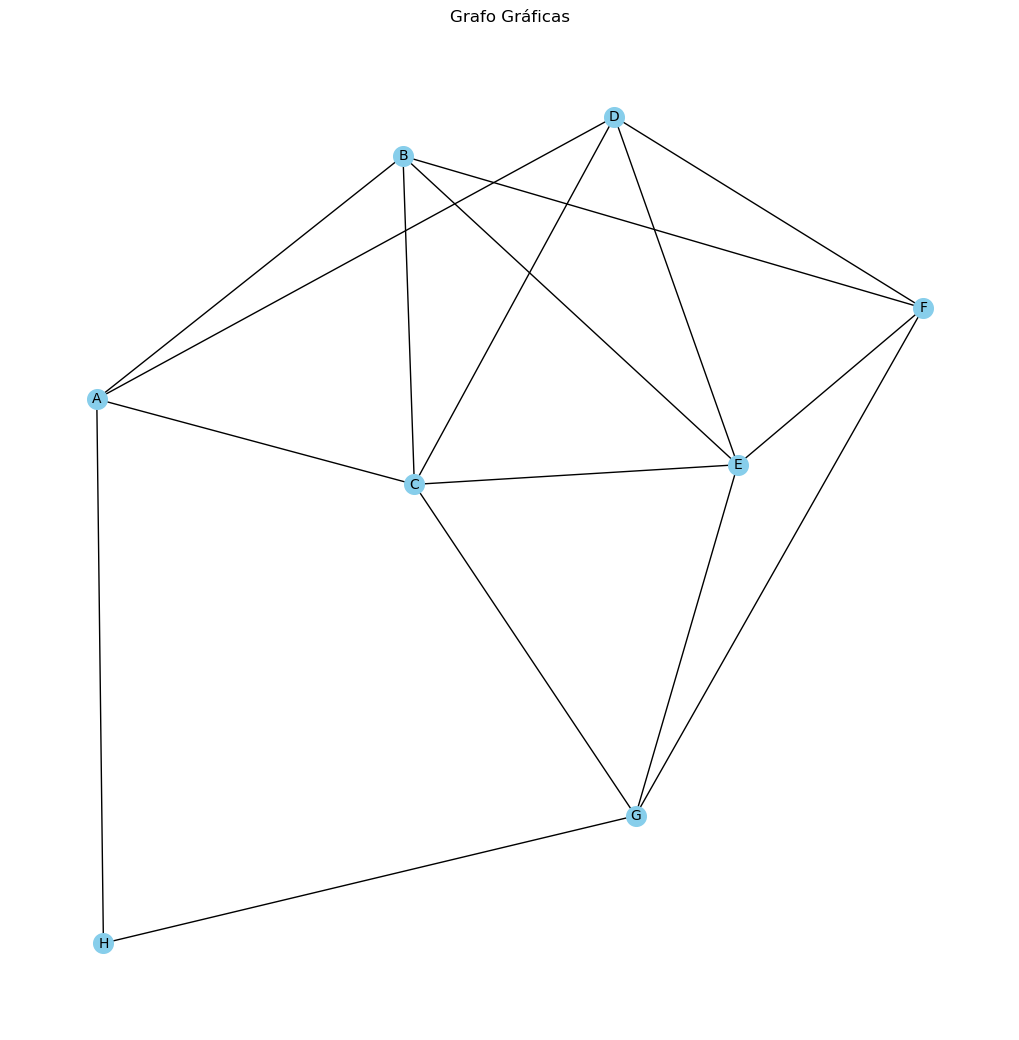

In [128]:
G = nx.from_pandas_edgelist(repartos_df, 'Origen', 'Destino')

# Visualizar el grafo
plt.figure(figsize=(10, 10))
nx.draw(G, with_labels=True, node_size=200, node_color='skyblue', font_size=10, font_color='black')
plt.title('Grafo Gráficas')
plt.show()


<h3>Prueba hecha con clases</h3>

In [ ]:
# Instancio todos los nodos del grafo

# Agrupo los nodos para no tener ningun dato repetido
Nodos = repartos_df.groupby('Origen').size().reset_index(name='repetido')
Nodos = Nodos['Origen']

# Creo una lista donde voy a guardar los nodos despues de estar instanciados
lista_Nodos = []
for nodo in Nodos:
    nodo = Nodo(nodo)
    lista_Nodos.append(nodo)


In [135]:
for nodo in lista_Nodos:
    print(nodo.nombre)

A
B
C
D
E
F
G
H
